In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as const
import scipy.integrate as integrate

In [5]:
#T2

#Hubble lenght for H0 = 100 km/s/Mpc
H0_100 = 100 * 1e3 #m/s/Mpc
l_H = const.c.value/H0_100 #Mpc
print('l_H[Gpc]:',l_H/1e3)

#Hubble length for different Hubble constants inj units Mpc/h
def l_H(H):
    h = H/H0_100
    l_H = const.c.value/H0_100/1e3/h #Gpc/h
    print('h[dimensionless]:',h,'l_H[Gpc/h]:',l_H)
H = [40,80,100]
for H in H:
    l_H(H)

l_H[Gpc]: 2.99792458
h[dimensionless]: 0.0004 l_H[Gpc/h]: 7494.811449999999
h[dimensionless]: 0.0008 l_H[Gpc/h]: 3747.4057249999996
h[dimensionless]: 0.001 l_H[Gpc/h]: 2997.92458


In [6]:
#T2 (alternativly)

#constants
c = const.c
Mpc = 1e6 *const.pc
kpc = 1e3 *const.pc
H0 = 70 * 1e3 *u.m / (u.s * Mpc) #H0 == 70 km/(s Mpc)
H0_100 = 100 * 1e2 *u.m / (u.s * Mpc)
H0_80 = 80 * 1e2 *u.m / (u.s * Mpc)
H0_40 = 40 * 1e2 *u.m / (u.s * Mpc)

#Hubble length in Mpch^-1
def D_T2():
    return c/H0_100 

def h(H0_i):
    return H0_i/H0_100

#Hubble length in Mpc
def D_T2_Mpc(H0_i):
    return D_T2()*h(H0_i)**(-1)/Mpc

print(r'for H_0=70 ; in Mpc',D_T2_Mpc(H0))
print(r'for H_0=40 ; in Mpc',D_T2_Mpc(H0_40))
print(r'for H_0=80 ; in Mpc',D_T2_Mpc(H0_80))
print(r'for H_0=100 ; in Mpc',D_T2_Mpc(H0_100))

for H_0=70 ; in Mpc 4282.7494
for H_0=40 ; in Mpc 74948.1145
for H_0=80 ; in Mpc 37474.05725
for H_0=100 ; in Mpc 29979.2458


In [7]:
#T3.1
c = const.c.value #m/s
H0_100 = 100 * 1e3  # m/s/Mpc
Mpc = 1e6 *const.pc.value #m
kpc = 1e3 *const.pc.value #m

#arcsec, arcmin in rad
arcsec_in_rad = np.deg2rad(1 / 3600)
arcmin_in_rad = np.deg2rad(1 / 60)

print('arcsec_in_rad',arcsec_in_rad)
print('arcmin_in_rad',arcmin_in_rad)

#angular distance in m/h
def D(z): 
    return 2 * c / H0_100 * (1 / (1 + z) - 1 / (1 + z)**(3/2))*Mpc #m/h
    
print('D(0.4) in [m/h]', D(0.4), 'D(0.4) in [Mpch^-1]', D(0.4)/Mpc)

# calc of Delta_xi
def delta_xi(z, dtheta_rad): 
    dxi = D(z) * dtheta_rad
    dxi_kpc = dxi / kpc
    dxi_Mpc = dxi / Mpc
    return dxi_kpc, dxi_Mpc


dxi_kpc_1, dxi_Mpc_1 = delta_xi(0.4, arcsec_in_rad)
dxi_kpc_2, dxi_Mpc_2 = delta_xi(0.4, arcmin_in_rad)

print(f'Delta_xi for 1 arcsec at z=0.4: {dxi_kpc_1} kpc/h, {dxi_Mpc_1} Mpc/h')
print(f'Delta_xi for 1 arcmin at z=0.4: {dxi_kpc_2} kpc/h, {dxi_Mpc_2} Mpc/h')

arcsec_in_rad 4.84813681109536e-06
arcmin_in_rad 0.0002908882086657216
D(0.4) in [m/h] 2.046314986071447e+25 D(0.4) in [Mpch^-1] 663.165522653998
Delta_xi for 1 arcsec at z=0.4: 3.215117182228142 kpc/h, 0.003215117182228142 Mpc/h
Delta_xi for 1 arcmin at z=0.4: 192.9070309336885 kpc/h, 0.1929070309336885 Mpc/h


In [8]:
#T3.2
# Cluster of Abell-radius
r_abell = 1.5 * Mpc  # Mpc/h

# angular diameter
def dtheta(z):
    dtheta_rad = r_abell / D(z)  # rad
    dtheta_deg = np.rad2deg(dtheta_rad)  # °
    dtheta_arcmin = dtheta_deg * 60  # arcmin
    return dtheta_rad, dtheta_deg, dtheta_arcmin

for z in [0.2, 0.4, 1.0, 1.5]:
    dtheta_rad, dtheta_deg, dtheta_arcmin = dtheta(z)
    print(f'z={z}: {dtheta_rad:.5f} rad, {dtheta_deg:.5f} degrees, {dtheta_arcmin:.2f} arcmin')

z=0.2: 0.00345 rad, 0.19742 degrees, 11.84 arcmin
z=0.4: 0.00226 rad, 0.12960 degrees, 7.78 arcmin
z=1.0: 0.00171 rad, 0.09788 degrees, 5.87 arcmin
z=1.5: 0.00170 rad, 0.09750 degrees, 5.85 arcmin


In [9]:
#T4
def arcsec2rad(arcsec):
    return np.deg2rad(arcsec / 3600)

def delta_xi(z, FOV_arcsec): 
    dxi = D(z) * arcsec2rad(FOV_arcsec)  
    dxi_kpc = dxi / kpc  
    dxi_Mpc = dxi / Mpc  
    return dxi_kpc, dxi_Mpc

FOV = [160, 552.96, 1638.4]  
redshift = [0.1, 0.4, 1]
cam = ["WFPC-2", "EMMI", "UHK8"]

for theta, name in zip(FOV, cam):
    print(f"Cam: {name}")
    for red in redshift:
        t = arcsec2rad(theta)
        dxi_kpc, dxi_Mpc = delta_xi(red, theta)
        print(f"redshift z={red}: {dxi_kpc:.2f} kpc, {dxi_Mpc:.2f} Mpc.")
    print("\n")

Cam: WFPC-2
redshift z=0.1: 196.77 kpc, 0.20 Mpc.
redshift z=0.4: 514.42 kpc, 0.51 Mpc.
redshift z=1: 681.12 kpc, 0.68 Mpc.


Cam: EMMI
redshift z=0.1: 680.03 kpc, 0.68 Mpc.
redshift z=0.4: 1777.83 kpc, 1.78 Mpc.
redshift z=1: 2353.96 kpc, 2.35 Mpc.


Cam: UHK8
redshift z=0.1: 2014.91 kpc, 2.01 Mpc.
redshift z=0.4: 5267.65 kpc, 5.27 Mpc.
redshift z=1: 6974.69 kpc, 6.97 Mpc.




In [10]:
#T5
def rad2arcsec(rad):
    return rad * (180 * 3600) / np.pi

R_s = (2 * const.G.value * const.M_sun.value) / const.c.value**2
print(f"Schwarzschild radius of the Sun: {np.round(R_s,decimals=2)}")

R_sun = 7 * 10**8 

deflection_angle_rad = (2 * R_s) / R_sun
deflection_angle_arcsec = rad2arcsec(deflection_angle_rad)

print(f"Deflection angle of light at the Sun's boundary in arcsec: {deflection_angle_arcsec:.3f}")

Schwarzschild radius of the Sun: 2953.25
Deflection angle of light at the Sun's boundary in arcsec: 1.740


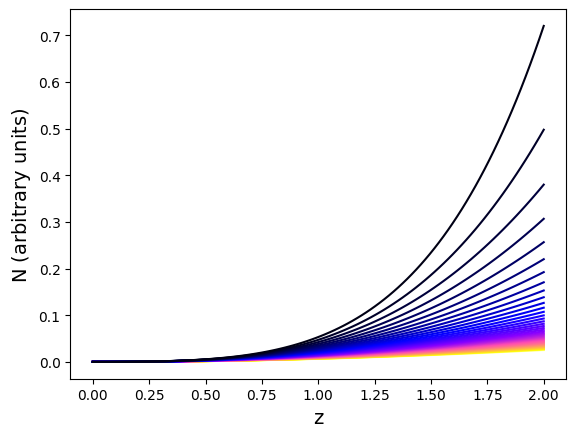

In [14]:
#T7
def integral(t, L):
    return 1 / np.sqrt((1-L)*(1 + t)**3 + L)

t = np.linspace(0, 15, 100)


def I(x, L):
    result, _ = integrate.quad(integral, 0, x, args=(L,))
    return result

cmap = plt.cm.gnuplot2_r
L_values = np.linspace(0, 1, 50) 


x_values = np.linspace(0, 2, 100)


#plt.figure(figsize=(8, 6))

for i, L in enumerate(L_values):
    I_values = [(1+x)**3*(1 / np.sqrt((1-L)*(1 + x)**3 + L))*I(x, L)**2/150 for x in x_values]  # Berechne I(x, L) für jedes x
    plt.plot(x_values, I_values, color=cmap(i / len(L_values)))

plt.xlabel(r"$\text{z}$", fontsize=14)
plt.ylabel(r"$\text{N (arbitrary units)}$", fontsize=14)
#plt.savefig('T7.pdf', format='pdf')
plt.show()

In [12]:
#T9
def theta_E(sigma):
    return np.rad2deg(4*np.pi*(sigma/const.c.value)**2)*3600

sigma1 = 220 *1e3 #m/s
sigma2 = 800 *1e3 #m/s
sigma3 = 1000 *1e3 #m/s
sigma4 = 1200 *1e3 #m/s
print(theta_E(sigma1),theta_E(sigma2),theta_E(sigma3),theta_E(sigma4)) #in arcsec


1.3958506495208338 18.457529249862265 28.839889452909794 41.529440812190096


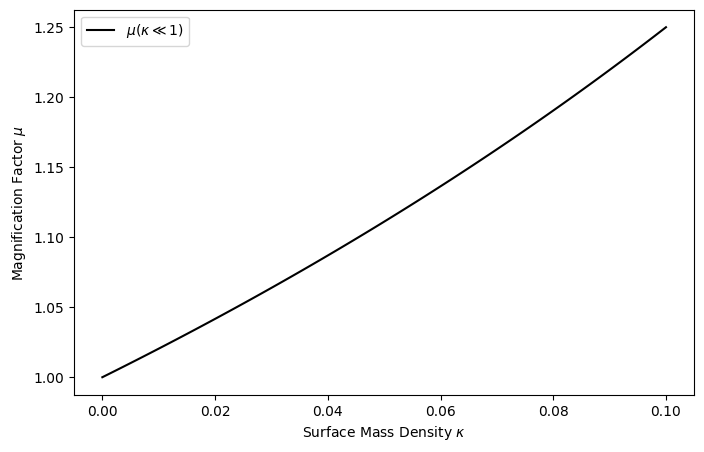

In [13]:
#T8
#Define kappa values (weak lensing regime, kappa << 1)
kappa_vals = np.linspace(0, 0.1, 100)

#Magnification factor for weak lenses where gamma ≈ kappa
mu_approx = 1 / (1 - 2 * kappa_vals)

plt.figure(figsize=(8, 5))
plt.plot(kappa_vals, mu_approx, label=r"$\mu(\kappa \ll 1)$", color='black')
plt.xlabel('Surface Mass Density $\\kappa$')
plt.ylabel('Magnification Factor $\\mu$')
plt.legend()
#plt.savefig('weaklensingapprox.pdf', format='pdf')
plt.show()